In [1]:
import tensorflow 
#print("TensorFlow version:", tf.__version__)



In [2]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
import numpy as np
from numpy.linalg import norm
import os
from tqdm import tqdm
import pickle
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors  # Add this import

In [3]:
model = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable = False

In [4]:
model = tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])

In [5]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d (Glob  (None, 2048)              0         
 alMaxPooling2D)                                                 
                                                                 
Total params: 23587712 (89.98 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________
None


In [6]:
def load_image(img_path, target_size=(224, 224)):
    img = cv2.imread(img_path)
    img = cv2.resize(img, target_size)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    return img

In [7]:
import cv2

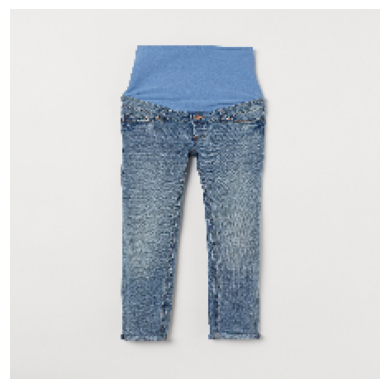

In [8]:
#load image is working perfectly 
# test case for laod imageh

def plot_image(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Example usage:
image_path = 'images/024/0249136006.jpg'  # Replace 'path_to_your_image.jpg' with the actual image path
input_image = load_image(image_path)
if input_image is not None:
    plot_image(input_image)
else:
    print("Failed to load the image.")

In [9]:
def extract_features(img_path,model):
    img = load_image(img_path,target_size=(224,224))
    img_array = np.array(img)  # Convert PIL image to NumPy array
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    result = model.predict(preprocessed_img).flatten()
    normalized_result = result / norm(result)

    return normalized_result

In [10]:


filenames = []

for root, dirs, files in os.walk('images'):
    for file in files:
        filenames.append(os.path.join(root, file))

# Remove the first item from the filenames list
if filenames:
    filenames = filenames[1:]



In [11]:
#test case for file names
print(filenames[:5])  # Print the first 5 filenames
total_files = len(filenames)
print("Total number of files:", total_files)
# Assuming you have a filename you want to check
file_to_check = "images/010/0108775015.jpg"
# Check if the file exists in the filenames list
if file_to_check in filenames:
    print(f"The file '{file_to_check}' exists in the filenames list.")
else:
    print(f"The file '{file_to_check}' does not exist in the filenames list.")

['images/024/0249136006.jpg', 'images/024/0244267027.jpg', 'images/024/0244267032.jpg', 'images/024/0240670058.jpg', 'images/024/0241436001.jpg']
Total number of files: 105100
The file 'images/010/0108775015.jpg' exists in the filenames list.


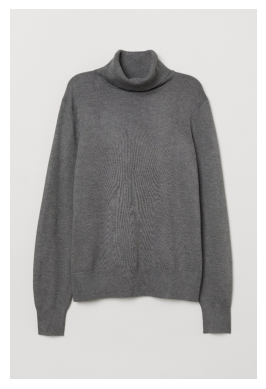

In [12]:
#test case


# Load the first image from the filenames list
image_path = 'images/067/0673677001.jpg'

# Open the image using PIL (Python Imaging Library)
image = Image.open(image_path)

# Display the image using Matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

In [24]:
'''def load_image(img_path, target_size=(224, 224)):
    img = cv2.imread(img_path)
    if img is None or img.size == 0:
        print(f"Error: Unable to load or empty image '{img_path}'")
        return None
    img = cv2.resize(img, target_size)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    return img'''


In [ ]:
'''

for file in tqdm(filenames[:100]):
    feature_list.append(extract_features(file,model))
    '''

In [13]:
feature_list = []

In [ ]:
'''
chunk_size = 2000
total_files = len(filenames)


for i in tqdm(range(0, total_files, chunk_size)):
    chunk_filenames = filenames[i:i+chunk_size]
    chunk_features = []

    for file in chunk_filenames:
        chunk_features.append(extract_features(file, model))

    feature_list.extend(chunk_features)

# Final save after processing all chunks
pickle.dump(feature_list, open('final_features.pkl', 'wb'))
pickle.dump(filenames, open('final_filename.pkl', 'wb'))
'''


In [14]:

# Load data from a pickle file
with open('/Users/azkayounus/Desktop/final_features.pkl', 'rb') as feature_emb:
    feature_list = pickle.load(feature_emb)
    
# Load data from a pickle file
with open('/Users/azkayounus/Desktop/final_filename.pkl', 'rb') as filenames_emb:
    filenamesss = pickle.load(filenames_emb)

In [15]:
print(len(filenamesss))
print(len(feature_list))



105100
105100


In [16]:
def recommend(input_features):
    neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')
    neighbors.fit(feature_list)
    distances, indices = neighbors.kneighbors([input_features])
    return indices


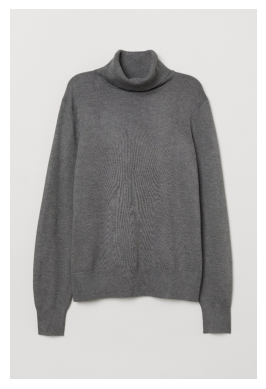

1/1 [==============================] - 0s 466ms/step
[0.00078889 0.07518981 0.00066678 ... 0.01275084 0.01845941 0.00923233]


(2048,)

In [25]:
#test case


# Load the first image from the filenames list
image_path = 'images/067/0673677001.jpg'

# Open the image using PIL (Python Imaging Library)
image = Image.open(image_path)

# Display the image using Matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

features = extract_features(image_path,model)
print(features)
features.shape

In [18]:
indices= recommend(features)
print(indices)

[[98558 79498  5158 78100 99165 70267]]


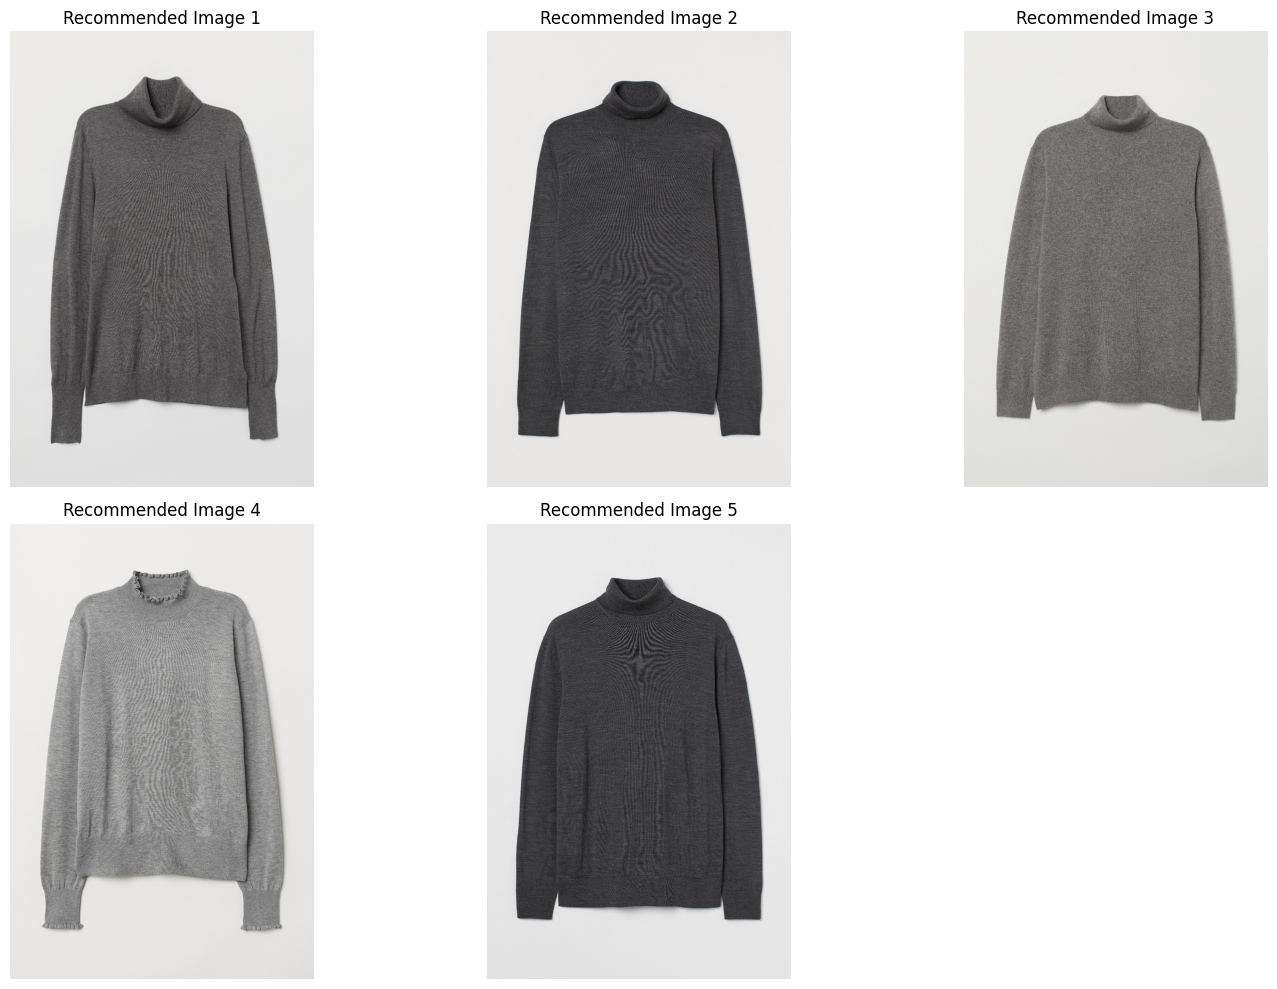

In [19]:
def display_recommendations(indices, filenames):
    plt.figure(figsize=(15, 10))
    
    for i, idx in enumerate(indices[0][1:], start=1):  # Exclude the first index which is the query image itself
        image_path = filenames[idx]
        image = Image.open(image_path)
        
        plt.subplot(2, 3, i)  # Adjust subplot layout as per your preference
        plt.imshow(image)
        plt.axis('off')
        plt.title(f"Recommended Image {i}")

    plt.tight_layout()
    plt.show()

# Assuming 'indices' and 'filenames' are already defined
display_recommendations(indices, filenames)


In [20]:
def get_recommendations(input_image_path):
    input_features = extract_features(input_image_path, model)
    indices = recommend(input_features)
    return indices

In [21]:
def indices_to_filenames(indices):
    recommended_images = []
    for idx in indices[0][1:]:
        recommended_images.append(filenames[idx])
    return recommended_images

In [141]:
def indices_to_image_urls(indices):
    base_url = 'http://10.7.225.2:5000/'
    image_urls = []
    for idx in indices[0][1:]:
        filename = filenames[idx]
        image_url = base_url + filename
        image_urls.append(image_url)
    return image_urls

In [22]:
from flask import Flask, request, jsonify,send_file  
import os

app = Flask(__name__)

In [149]:
@app.route('/recommendation', methods=['POST'])
def recommendation():
    # Receive image file from request
    image_file = request.files['image']

    # Save image file
    image_path = 'temp_image.jpg'
    image_file.save(image_path)

    # Get recommendations for the input image
    recommended_indices = get_recommendations(image_path)
    recommended_images = indices_to_filenames(recommended_indices)

    # Return recommended image filenames
    return jsonify({'recommended_images': recommended_images})

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://10.7.224.204:5000
Press CTRL+C to quit


1/1 [==============================] - 0s 114ms/step


10.7.224.200 - - [19/Apr/2024 16:01:56] "POST /recommendation HTTP/1.1" 200 -


In [147]:
from flask import Flask, request, jsonify, send_file
import os

app = Flask(__name__)

@app.route('/recommendation', methods=['POST'])
def recommendation():
    # Receive image file from request
    image_file = request.files['image']

    # Save image file
    image_path = 'temp_image.jpg'
    image_file.save(image_path)

    # Get recommendations for the input image
    recommended_indices = get_recommendations(image_path)
    recommended_images = indices_to_filenames(recommended_indices)

    # Return recommended image filenames and their base64 encoded data
    recommended_images_data = []
    for image_path in recommended_images:
        with open(image_path, "rb") as img_file:
            img_data = img_file.read()
            img_data_base64 = base64.b64encode(img_data).decode('utf-8')
            recommended_images_data.append({'path': image_path, 'data': img_data_base64})

    return jsonify({'recommended_images': recommended_images_data})

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)



 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://10.7.224.204:5000
Press CTRL+C to quit


1/1 [==============================] - 0s 156ms/step


10.7.224.200 - - [19/Apr/2024 15:59:07] "POST /recommendation HTTP/1.1" 200 -


In [155]:
from flask import Flask, request, jsonify, send_file
import os
import io

app = Flask(__name__)

@app.route('/recommendation', methods=['POST'])
def recommendation():
    # Receive image file from request
    image_file = request.files['image']

    # Save image file
    image_path = 'temp_image.jpg'
    image_file.save(image_path)

    # Get recommendations for the input image
    recommended_indices = get_recommendations(image_path)
    recommended_images = indices_to_filenames(recommended_indices)

    # Prepare response data with image paths and bytes
    response_data = {'recommended_images': []}
    for img_path in recommended_images:
        with open(img_path, 'rb') as f:
            img_bytes = io.BytesIO(f.read())
            response_data['recommended_images'].append({'path': img_path, 'bytes': img_bytes.getvalue()})

    # Return recommended image filenames and bytes
    return jsonify(response_data)

if __name__== '__main__':
    app.run(host='0.0.0.0', port=5000)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://10.7.224.204:5000
Press CTRL+C to quit


In [158]:
from flask import Flask, request, jsonify, send_file
import os
import io
import base64

app = Flask(__name__)
# Modify your Flask server code
@app.route('/recommendation', methods=['POST'])
def recommendation():
    # Receive image file from request
    image_file = request.files['image']

    # Save image file
    image_path = 'temp_image.jpg'
    image_file.save(image_path)

    # Get recommendations for the input image
    recommended_indices = get_recommendations(image_path)
    recommended_images = indices_to_filenames(recommended_indices)

    # Prepare response data with image paths and bytes
    response_data = {'recommended_images': []}
    for img_path in recommended_images:
        with open(img_path, 'rb') as f:
            img_bytes = f.read()
            img_base64 = base64.b64encode(img_bytes).decode('utf-8')
            response_data['recommended_images'].append({'path': img_path, 'bytes': img_base64})

    # Return recommended image filenames and bytes
    return jsonify(response_data)

if __name__== '__main__':
    app.run(host='0.0.0.0', port=5000)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://10.7.224.204:5000
Press CTRL+C to quit


1/1 [==============================] - 0s 125ms/step


10.7.224.200 - - [19/Apr/2024 16:19:52] "POST /recommendation HTTP/1.1" 200 -


In [159]:
from flask import Flask, request, jsonify, send_file
import os
import io

app = Flask(__name__)

@app.route('/get_image', methods=['POST'])
def get_image():
    # Receive image filename from request
    data = request.get_json()
    image_filename = data.get('image_filename')

    # Read image file as bytes
    image_path = os.path.join('path_to_images_directory', image_filename)  # Update path as per your directory structure
    with open(image_path, 'rb') as f:
        image_bytes = f.read()

    # Encode image bytes as base64
    image_base64 = base64.b64encode(image_bytes).decode('utf-8')

    # Return base64 encoded image
    return jsonify({'image_base64': image_base64})

if __name__== '__main__':
    app.run(host='0.0.0.0', port=5000)

In [160]:
from flask import Flask, request, send_file
import os
import random

app = Flask(__name__)

# Function to return three random images from a directory
def get_three_images():
    image_directory = "/Users/azkayounus/Desktop/images/016"  # Update this with your image directory path
    images = os.listdir(image_directory)
    # Choose 3 random images
    chosen_images = random.sample(images, 3)
    return chosen_images

@app.route('/upload', methods=['POST'])
def upload_file():
    if request.method == 'POST':
        # Check if the POST request has a file part
        if 'file' not in request.files:
            return 'No file part'

        file = request.files['file']
        # If the user does not select a file, the browser also submits an empty part without filename
        if file.filename == '':
            return 'No selected file'

        if file:
            # Save the uploaded file
            file.save(os.path.join("/Users/azkayounus/Desktop", file.filename))
            # Get three random images
            chosen_images = get_three_images()
            # Send the names of three random images back to the client
            return {'images': chosen_images}

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://10.7.224.204:5000
Press CTRL+C to quit
10.7.224.200 - - [19/Apr/2024 17:07:55] "POST /upload HTTP/1.1" 200 -


In [173]:
from flask import Flask, jsonify

app = Flask(__name__)

@app.route('/get_message', methods=['GET'])
def get_message():
    message = "http://assets.myntassets.com/v1/images/style/properties/dce310e4c15223a6c964631190263284_images.jpg"
    return jsonify({'message': message})


if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)



 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://10.7.224.204:5000
Press CTRL+C to quit
10.7.224.200 - - [19/Apr/2024 17:59:04] "GET /get_message HTTP/1.1" 200 -


saturday

In [ ]:
correct code

In [198]:
from flask import Flask, request, jsonify
from firebase_admin import credentials, storage, initialize_app
import random
import datetime

In [204]:
app = Flask(__name__)

# Initialize Firebase if not already initialized
if not firebase_admin._apps:
    cred = credentials.Certificate("/Users/azkayounus/Desktop/intellishop-37949-firebase-adminsdk-vh31q-81d7255bb3.json")
    firebase_app = initialize_app(cred, {'storageBucket': 'intellishop-37949.appspot.com'})

# Get a reference to the bucket
bucket = storage.bucket()

@app.route('/get_image', methods=['GET'])
def get_image():
    # Get a reference to the images folder in Firebase Storage
    images_folder = bucket.list_blobs(prefix='images/')

    # Get a random image URL from the images folder
    image_urls = [blob.name for blob in images_folder if blob.name]
    random_image_path = random.choice(image_urls)

    # Generate a signed URL with 1-hour expiration time
    expiration = datetime.timedelta(hours=1)
    signed_url = bucket.blob(random_image_path).generate_signed_url(expiration, method='GET')

    return jsonify({"image_url": signed_url})

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://10.7.225.49:5000
Press CTRL+C to quit


In [ ]:
code to read csv

In [206]:
import csv
import random
import datetime
from flask import Flask, request, jsonify
from firebase_admin import credentials, storage, initialize_app




In [207]:

app = Flask(__name__)

# Initialize Firebase if not already initialized
if not firebase_admin._apps:
    cred = credentials.Certificate("/Users/azkayounus/Desktop/intellishop-37949-firebase-adminsdk-vh31q-81d7255bb3.json")
    firebase_app = initialize_app(cred, {'storageBucket': 'intellishop-37949.appspot.com'})

# Get a reference to the bucket

# Get a reference to the bucket
bucket = storage.bucket()
@app.route('/get_image', methods=['GET'])
def get_image():
    # Get a reference to the fashion.csv file in Firebase Storage
    blob = bucket.blob('fashion.csv')

    # Download the CSV file
    blob.download_to_filename('/tmp/fashion.csv')

    # Read the CSV file
    image_data = []
    with open('/tmp/fashion.csv', newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            image_data.append((row['Image'], row['ImageURL']))

    # Get a random image data tuple from the list
    random_image, random_image_url = random.choice(image_data)

    return jsonify({"image": random_image, "image_url": random_image_url})

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://10.7.225.49:5000
Press CTRL+C to quit
10.7.225.139 - - [20/Apr/2024 16:46:08] "GET /get_image HTTP/1.1" 200 -
10.7.225.139 - - [20/Apr/2024 16:47:36] "GET /get_image HTTP/1.1" 200 -


In [ ]:
sunday

In [24]:


### final code###


from flask import Flask, request, jsonify
import firebase_admin
from firebase_admin import credentials, storage, initialize_app
import random
import datetime

app = Flask(__name__)

if not firebase_admin._apps:
    cred = credentials.Certificate('/Users/azkayounus/Desktop/intellishop-37949-firebase-adminsdk-vh31q-81d7255bb3.json') # Replace 'path/to/serviceAccountKey.json' with the path to your service account key JSON file
    firebase_admin.initialize_app(cred, { 'storageBucket': 'intellishop-37949.appspot.com' # Replace 'intellishop-37949.appspot.com' with your storage bucket URL
})

# Get a reference to the bucket
bucket = storage.bucket()

@app.route('/recommendation', methods=['POST'])
def recommendation():
    # Receive image file from request
    image_file = request.files['image']

    # Save image file temporarily
    image_path = 'temp_image.jpg'
    image_file.save(image_path)

    # Get recommendations for the input image
    recommended_indices = get_recommendations(image_path)
    recommended_images = indices_to_filenames(recommended_indices)

    # Get recommended images from Firebase Storage
    recommended_image_urls = get_recommended_images_from_storage(recommended_images)

    # Return recommended image URLs
    return jsonify({'recommended_image_urls': recommended_image_urls})

def get_recommended_images_from_storage(recommended_images):
    recommended_image_urls = []
    for image_path in recommended_images:
        # Generate a signed URL with 1-hour expiration time
        expiration = datetime.timedelta(hours=1)
        signed_url = bucket.blob(image_path).generate_signed_url(expiration, method='GET')
        recommended_image_urls.append(signed_url)
    return recommended_image_urls


if __name__ == '__main__':
    app.run(host='0.0.0.0', port=6000)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:6000
 * Running on http://192.168.1.194:6000
Press CTRL+C to quit


In [208]:
import os
from firebase_admin import storage
import firebase_admin
from firebase_admin import credentials



In [214]:
# Initialize Firebase Admin SDK

if not firebase_admin._apps:
    cred = credentials.Certificate('/Users/azkayounus/Desktop/intellishop-37949-firebase-adminsdk-vh31q-81d7255bb3.json') # Replace 'path/to/serviceAccountKey.json' with the path to your service account key JSON file
    firebase_admin.initialize_app(cred, { 'storageBucket': 'intellishop-37949.appspot.com' # Replace 'intellishop-37949.appspot.com' with your storage bucket URL
})

# Path to the folder containing images
folder_path = '/Users/azkayounus/Desktop/images/011'  # Replace 'path/to/your/image/folder' with the path to your image folder

# Get list of image files in the folder
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Upload each image to Firebase Storage
for image_file in image_files:
    # Construct path to the local image file
    local_file_path = os.path.join(folder_path, image_file)
    
    # Construct path to the destination in Firebase Storage
    destination_path = 'images/011/' + image_file  # Adjust 'images/' to the desired folder structure in Firebase Storage
    
    # Upload the image
    try:
        blob = storage.bucket().blob(destination_path)
        blob.upload_from_filename(local_file_path)
        print(f"Image '{image_file}' uploaded successfully.")
    except Exception as e:
        print(f"Error uploading image '{image_file}': {e}")

Image '0112679048.jpg' uploaded successfully.
Image '0111609001.jpg' uploaded successfully.
Image '0111565003.jpg' uploaded successfully.
Image '0111565001.jpg' uploaded successfully.
Image '0111586001.jpg' uploaded successfully.
Image '0114428026.jpg' uploaded successfully.
Image '0118458039.jpg' uploaded successfully.
Image '0118458004.jpg' uploaded successfully.
Image '0118458038.jpg' uploaded successfully.
Image '0114428030.jpg' uploaded successfully.
Image '0118458028.jpg' uploaded successfully.
Image '0118458029.jpg' uploaded successfully.
Image '0118458003.jpg' uploaded successfully.
Image '0110065001.jpg' uploaded successfully.
Image '0116379047.jpg' uploaded successfully.
Image '0110065002.jpg' uploaded successfully.
Image '0118458034.jpg' uploaded successfully.
Image '0110065011.jpg' uploaded successfully.
Image '0112679052.jpg' uploaded successfully.
Image '0111593001.jpg' uploaded successfully.


In [ ]:

if not firebase_admin._apps:
    cred = credentials.Certificate('/Users/azkayounus/Desktop/intellishop-37949-firebase-adminsdk-vh31q-81d7255bb3.json') # Replace 'path/to/serviceAccountKey.json' with the path to your service account key JSON file
    firebase_admin.initialize_app(cred, { 'storageBucket': 'intellishop-37949.appspot.com' # Replace 'intellishop-37949.appspot.com' with your storage bucket URL
})

# Path to the folder containing subfolders with images

folder_path = '/Users/azkayounus/Desktop/images/'   # Replace 'path/to/your/images/folder' with the path to your images folder

# Get list of subfolders in the main folder
subfolders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]

# Upload images from each subfolder to Firebase Storage
for subfolder in subfolders:
    subfolder_path = os.path.join(folder_path, subfolder)
    # Get list of image files in the subfolder
    image_files = [f for f in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, f))]
    
    # Upload each image in the subfolder to Firebase Storage
    for image_file in image_files:
        # Construct path to the local image file
        local_file_path = os.path.join(subfolder_path, image_file)
        
        # Construct path to the destination in Firebase Storage
        destination_path = 'images/' + f'{subfolder}/{image_file}'
        
        # Upload the image
        try:
            blob = storage.bucket().blob(destination_path)
            blob.upload_from_filename(local_file_path)
            print(f"Image '{image_file}' in folder '{subfolder}' uploaded successfully.")
        except Exception as e:
            print(f"Error uploading image '{image_file}' in folder '{subfolder}': {e}")

        # Check if the subfolder exists in Firebase Storage
        folder_ref = storage.bucket().get_blob(subfolder)
        if not folder_ref:
            # Create the subfolder in Firebase Storage
            storage.bucket().blob(subfolder + '/').upload_from_string('')
            print(f"Folder '{subfolder}' created in Firebase Storage.")



Image '0249136006.jpg' in folder '024' uploaded successfully.
Folder '024' created in Firebase Storage.
Image '0244267027.jpg' in folder '024' uploaded successfully.
Folder '024' created in Firebase Storage.
Image '0244267032.jpg' in folder '024' uploaded successfully.
Folder '024' created in Firebase Storage.
Image '0240670058.jpg' in folder '024' uploaded successfully.
Folder '024' created in Firebase Storage.
Image '0241436001.jpg' in folder '024' uploaded successfully.
Folder '024' created in Firebase Storage.
Image '0249136011.jpg' in folder '024' uploaded successfully.
Folder '024' created in Firebase Storage.
Image '0241590001.jpg' in folder '024' uploaded successfully.
Folder '024' created in Firebase Storage.
Image '0240840032.jpg' in folder '024' uploaded successfully.
Folder '024' created in Firebase Storage.
Image '0244269020.jpg' in folder '024' uploaded successfully.
Folder '024' created in Firebase Storage.
Image '0244853036.jpg' in folder '024' uploaded successfully.
Fo

ReadTimeout: HTTPSConnectionPool(host='storage.googleapis.com', port=443): Read timed out. (read timeout=60)

simple image retrival from firebase

In [229]:
from flask import Flask, jsonify, send_file
import firebase_admin
from firebase_admin import credentials, storage, initialize_app
import random
import datetime

app = Flask(__name__)

if not firebase_admin._apps:
    cred = credentials.Certificate('/Users/azkayounus/Desktop/intellishop-37949-firebase-adminsdk-vh31q-81d7255bb3.json') # Replace 'path/to/serviceAccountKey.json' with the path to your service account key JSON file
    firebase_admin.initialize_app(cred, { 'storageBucket': 'intellishop-37949.appspot.com' # Replace 'intellishop-37949.appspot.com' with your storage bucket URL
})

# Get a reference to the bucket
bucket = storage.bucket()

@app.route('/get_image', methods=['GET'])
def get_image():
    try:
        # Replace 'images/your_image.jpg' with the specific image path you want to retrieve
        image_path = "images/057/0579990002.jpg"
        
        # Generate a signed URL with 1-hour expiration time
        expiration = datetime.timedelta(hours=1)
        signed_url = bucket.blob(image_path).generate_signed_url(expiration, method='GET')
        
        return jsonify({'image_url': signed_url})
    except Exception as e:
        return jsonify({'error': str(e)}), 500

    
if __name__ == '__main__':
    app.run(host='0.0.0.0', port=6000)    

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:6000
 * Running on http://10.7.224.96:6000
Press CTRL+C to quit
10.7.192.37 - - [21/Apr/2024 13:31:08] "GET /get_image HTTP/1.1" 200 -
